# WQD7005 - Data Mining
## MIDTERM EXAM

### Matrix Number : 17043640

### Name                 : Gunasegarran Magadevan

#### 1.You are required  to write code that will crawl the WWW (your familiar domain)  of a particular website and collect data from social media or from report or news and so on and to produce dataset.

In [1]:
# importing libraries
%matplotlib inline

from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import csv
from pathlib import Path
import csv

In [2]:
url = "https://www.investing.com/commodities/natural-gas-historical-data"
req = urllib.request.Request(url, data=None, headers={'User-Agent': 'Chrome/35.0.1916.47'})

soup = BeautifulSoup(urllib.request.urlopen(req).read(),"lxml")

#extract data 
rows = soup.find('table',{'class': 'genTbl closedTbl historicalTbl'}).findAll('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip(' ') for ele in cols]
    data.append([ele for ele in cols if ele])
 
#extract column names 
colnames = soup.find('table',{'class': 'genTbl closedTbl historicalTbl'}).findAll('tr')[:1]
col_names = []
for col in colnames:
    cols = col.find_all('th')
    cols = [ele.text.strip() for ele in cols]
    col_names.append(cols)
col_names = col_names[0]

gasRate = pd.DataFrame(data,columns = col_names)
gasRate.head()

Date  Price   Open   High    Low     Vol. Change %
0  May 15, 2020  1.712  1.699  1.731  1.686        -    1.84%
1  May 14, 2020  1.681  1.643  1.715  1.610  206.53K    4.02%
2  May 13, 2020  1.616  1.695  1.741  1.595  254.68K   -6.05%
3  May 12, 2020  1.720  1.847  1.849  1.685  228.49K   -5.81%
4  May 11, 2020  1.826  1.838  1.890  1.803  224.97K    0.16%

In [3]:
url = "https://www.investing.com/currencies/usd-myr-historical-data"
req = urllib.request.Request(url, data=None, headers={'User-Agent': 'Chrome/35.0.1916.47'})

soup = BeautifulSoup(urllib.request.urlopen(req).read(),"lxml")

#extract data 
rows = soup.find('table',{'class': 'genTbl closedTbl historicalTbl'}).findAll('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip(' ') for ele in cols]
    data.append([ele for ele in cols if ele])
 
#extract column names 
colnames = soup.find('table',{'class': 'genTbl closedTbl historicalTbl'}).findAll('tr')[:1]
col_names = []
for col in colnames:
    cols = col.find_all('th')
    cols = [ele.text.strip() for ele in cols]
    col_names.append(cols)
col_names = col_names[0]

currencyExchange = pd.DataFrame(data,columns = col_names)
currencyExchange.head()


Date   Price    Open    High     Low Change %
0  May 15, 2020  4.3510  4.3420  4.3520  4.3295    0.24%
1  May 14, 2020  4.3405  4.3390  4.3405  4.3340    0.23%
2  May 13, 2020  4.3305  4.3330  4.3450  4.3235    0.07%
3  May 12, 2020  4.3275  4.3340  4.3630  4.3265   -0.17%
4  May 11, 2020  4.3350  4.3340  4.3450  4.3340    0.02%

#### 2.After that you are required to write code to modify and/or select your the attributes to perform the following tasks:
- Data Cleaning
- Data Integration 
- Data Transformation
- Data Reduction

Hint : Make sure that use graph to help you select appropriate attributes to perform the above tasks.

#### 3.You are required to write data cleaning code  using the appropriate attribute (Question 2). In order to achieve the task, you are going to cover the following steps:
- Importing required libraries
- Loading Data
- Before data cleaning, plot your result (attribute)
- Data cleaning
- After data cleaning, plot your result (attribute)



In [4]:
gasRate.head()

Date  Price   Open   High    Low     Vol. Change %
0  May 15, 2020  1.712  1.699  1.731  1.686        -    1.84%
1  May 14, 2020  1.681  1.643  1.715  1.610  206.53K    4.02%
2  May 13, 2020  1.616  1.695  1.741  1.595  254.68K   -6.05%
3  May 12, 2020  1.720  1.847  1.849  1.685  228.49K   -5.81%
4  May 11, 2020  1.826  1.838  1.890  1.803  224.97K    0.16%

In [5]:
currencyExchange.head()

Date   Price    Open    High     Low Change %
0  May 15, 2020  4.3510  4.3420  4.3520  4.3295    0.24%
1  May 14, 2020  4.3405  4.3390  4.3405  4.3340    0.23%
2  May 13, 2020  4.3305  4.3330  4.3450  4.3235    0.07%
3  May 12, 2020  4.3275  4.3340  4.3630  4.3265   -0.17%
4  May 11, 2020  4.3350  4.3340  4.3450  4.3340    0.02%

In [6]:
# checking any null value
gasRate.isnull().values.any()

False

In [7]:
# checking any null value
gasRate.isnull().values.any()

False

In [8]:
#Removing the symbol '%' as last char in the column
gasRate['Change %'] = gasRate['Change %'].str[:-1]
currencyExchange['Change %'] = list(map(lambda x: x[:-1], currencyExchange['Change %'].values))

In [9]:
gasRate.head()

Date  Price   Open   High    Low     Vol. Change %
0  May 15, 2020  1.712  1.699  1.731  1.686        -     1.84
1  May 14, 2020  1.681  1.643  1.715  1.610  206.53K     4.02
2  May 13, 2020  1.616  1.695  1.741  1.595  254.68K    -6.05
3  May 12, 2020  1.720  1.847  1.849  1.685  228.49K    -5.81
4  May 11, 2020  1.826  1.838  1.890  1.803  224.97K     0.16

In [10]:
currencyExchange.head()

Date   Price    Open    High     Low Change %
0  May 15, 2020  4.3510  4.3420  4.3520  4.3295     0.24
1  May 14, 2020  4.3405  4.3390  4.3405  4.3340     0.23
2  May 13, 2020  4.3305  4.3330  4.3450  4.3235     0.07
3  May 12, 2020  4.3275  4.3340  4.3630  4.3265    -0.17
4  May 11, 2020  4.3350  4.3340  4.3450  4.3340     0.02

#### 4.You are required to write data integration code  using the appropriate attribute (Question 2). In order to achieve the task, you are going to cover the following steps:
- Importing required libraries
- Loading Data
- Before data integration,  plot your result (attributes from www, social media, report, news)
- Data integration
- After data integration, plot your result (attributes from www, social media, report, news)


In [11]:
gasRate.head()

Date  Price   Open   High    Low     Vol. Change %
0  May 15, 2020  1.712  1.699  1.731  1.686        -     1.84
1  May 14, 2020  1.681  1.643  1.715  1.610  206.53K     4.02
2  May 13, 2020  1.616  1.695  1.741  1.595  254.68K    -6.05
3  May 12, 2020  1.720  1.847  1.849  1.685  228.49K    -5.81
4  May 11, 2020  1.826  1.838  1.890  1.803  224.97K     0.16

In [12]:
currencyExchange.head()

Date   Price    Open    High     Low Change %
0  May 15, 2020  4.3510  4.3420  4.3520  4.3295     0.24
1  May 14, 2020  4.3405  4.3390  4.3405  4.3340     0.23
2  May 13, 2020  4.3305  4.3330  4.3450  4.3235     0.07
3  May 12, 2020  4.3275  4.3340  4.3630  4.3265    -0.17
4  May 11, 2020  4.3350  4.3340  4.3450  4.3340     0.02

In [13]:
# merging goldRate and currencyExchange, by Date (foreignKey indexing)
new_df = pd.merge(gasRate, currencyExchange, on = 'Date')
new_df.head(10)

Date Price_x Open_x High_x  Low_x     Vol. Change %_x Price_y  \
0  May 15, 2020   1.712  1.699  1.731  1.686        -       1.84  4.3510   
1  May 14, 2020   1.681  1.643  1.715  1.610  206.53K       4.02  4.3405   
2  May 13, 2020   1.616  1.695  1.741  1.595  254.68K      -6.05  4.3305   
3  May 12, 2020   1.720  1.847  1.849  1.685  228.49K      -5.81  4.3275   
4  May 11, 2020   1.826  1.838  1.890  1.803  224.97K       0.16  4.3350   
5  May 08, 2020   1.823  1.901  1.927  1.811  188.40K      -3.75  4.3340   
6  May 06, 2020   1.944  2.087  2.111  1.929  265.47K      -8.90  4.3245   
7  May 05, 2020   2.134  1.991  2.162  1.981  307.83K       7.07  4.3025   
8  May 04, 2020   1.993  1.961  2.006  1.935  187.91K       5.45  4.3165   
9  Apr 30, 2020   1.949  1.878  1.953  1.825  169.44K       4.28  4.2980   

   Open_y  High_y   Low_y Change %_y  
0  4.3420  4.3520  4.3295       0.24  
1  4.3390  4.3405  4.3340       0.23  
2  4.3330  4.3450  4.3235       0.07  
3  4.3340  4.3630  4.3265      -0.17  
4  4.3340  4.3450  4.3340       0.02  
5  4.3100  4.3400  4.2985       0.22  
6  4.3030  4.3255  4.3030       0.51  
7  4.3105  4.3170  4.3010      -0.32  
8  4.3000  4.3500  4.2980       0.43  
9  4.3375  4.3375  4.2900      -1.05

#### 5.You are required to write data transformation code  using the appropriate attribute (Question 2). In order to achieve the task, you are going to cover the following steps:
- Importing required libraries
- Loading Data
- Before data transformation,  plot your result (attributes)
- Data transformation
- After data transformation, plot your result (attributes)
                                  
Hint : Normalization, Aggregation and Generalization


In [14]:
new_df.head(10)

Date Price_x Open_x High_x  Low_x     Vol. Change %_x Price_y  \
0  May 15, 2020   1.712  1.699  1.731  1.686        -       1.84  4.3510   
1  May 14, 2020   1.681  1.643  1.715  1.610  206.53K       4.02  4.3405   
2  May 13, 2020   1.616  1.695  1.741  1.595  254.68K      -6.05  4.3305   
3  May 12, 2020   1.720  1.847  1.849  1.685  228.49K      -5.81  4.3275   
4  May 11, 2020   1.826  1.838  1.890  1.803  224.97K       0.16  4.3350   
5  May 08, 2020   1.823  1.901  1.927  1.811  188.40K      -3.75  4.3340   
6  May 06, 2020   1.944  2.087  2.111  1.929  265.47K      -8.90  4.3245   
7  May 05, 2020   2.134  1.991  2.162  1.981  307.83K       7.07  4.3025   
8  May 04, 2020   1.993  1.961  2.006  1.935  187.91K       5.45  4.3165   
9  Apr 30, 2020   1.949  1.878  1.953  1.825  169.44K       4.28  4.2980   

   Open_y  High_y   Low_y Change %_y  
0  4.3420  4.3520  4.3295       0.24  
1  4.3390  4.3405  4.3340       0.23  
2  4.3330  4.3450  4.3235       0.07  
3  4.3340  4.3630  4.3265      -0.17  
4  4.3340  4.3450  4.3340       0.02  
5  4.3100  4.3400  4.2985       0.22  
6  4.3030  4.3255  4.3030       0.51  
7  4.3105  4.3170  4.3010      -0.32  
8  4.3000  4.3500  4.2980       0.43  
9  4.3375  4.3375  4.2900      -1.05

In [15]:
# adding new column to compare the difference of Change %_y (CurrencExchange) and Change %_x (gasRate)
# also converted the numeric to allow mathematic function to work
new_df['VS_Change'] = pd.to_numeric(new_df['Change %_y'].values) - pd.to_numeric(new_df['Change %_x'].values)
new_df.head()



Date Price_x Open_x High_x  Low_x     Vol. Change %_x Price_y  \
0  May 15, 2020   1.712  1.699  1.731  1.686        -       1.84  4.3510   
1  May 14, 2020   1.681  1.643  1.715  1.610  206.53K       4.02  4.3405   
2  May 13, 2020   1.616  1.695  1.741  1.595  254.68K      -6.05  4.3305   
3  May 12, 2020   1.720  1.847  1.849  1.685  228.49K      -5.81  4.3275   
4  May 11, 2020   1.826  1.838  1.890  1.803  224.97K       0.16  4.3350   

   Open_y  High_y   Low_y Change %_y  VS_Change  
0  4.3420  4.3520  4.3295       0.24      -1.60  
1  4.3390  4.3405  4.3340       0.23      -3.79  
2  4.3330  4.3450  4.3235       0.07       6.12  
3  4.3340  4.3630  4.3265      -0.17       5.64  
4  4.3340  4.3450  4.3340       0.02      -0.14

In [16]:
# function for USD converting to MYR
# https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=MYR
def USD2MYR(x):
    convert= pd.to_numeric(x) * 4.35
    return convert

new_df['VS_Change_MYR'] = new_df['VS_Change'].apply(USD2MYR)
new_df['Price_GasRate_MYR'] = new_df['Price_x'].apply(USD2MYR)
new_df['Price_CurrencyExchange_MYR'] = new_df['Price_y'].apply(USD2MYR)
new_df.head()

Date Price_x Open_x High_x  Low_x     Vol. Change %_x Price_y  \
0  May 15, 2020   1.712  1.699  1.731  1.686        -       1.84  4.3510   
1  May 14, 2020   1.681  1.643  1.715  1.610  206.53K       4.02  4.3405   
2  May 13, 2020   1.616  1.695  1.741  1.595  254.68K      -6.05  4.3305   
3  May 12, 2020   1.720  1.847  1.849  1.685  228.49K      -5.81  4.3275   
4  May 11, 2020   1.826  1.838  1.890  1.803  224.97K       0.16  4.3350   

   Open_y  High_y   Low_y Change %_y  VS_Change  VS_Change_MYR  \
0  4.3420  4.3520  4.3295       0.24      -1.60        -6.9600   
1  4.3390  4.3405  4.3340       0.23      -3.79       -16.4865   
2  4.3330  4.3450  4.3235       0.07       6.12        26.6220   
3  4.3340  4.3630  4.3265      -0.17       5.64        24.5340   
4  4.3340  4.3450  4.3340       0.02      -0.14        -0.6090   

   Price_GasRate_MYR  Price_CurrencyExchange_MYR  
0            7.44720                   18.926850  
1            7.31235                   18.881175  
2            7.02960                   18.837675  
3            7.48200                   18.824625  
4            7.94310                   18.857250

#### 6.You are required to write data reduction code  using the appropriate attribute (Question 2). In order to achieve the task, you are going to cover the following steps:
- Importing required libraries
- Loading Data
- Before data reduction,  plot your result (attributes)
- Data reduction
- After data reduction, plot your result (attributes)
                                  
Hint :  Dimensionality Reduction 



In [17]:
new_df.head()

Date Price_x Open_x High_x  Low_x     Vol. Change %_x Price_y  \
0  May 15, 2020   1.712  1.699  1.731  1.686        -       1.84  4.3510   
1  May 14, 2020   1.681  1.643  1.715  1.610  206.53K       4.02  4.3405   
2  May 13, 2020   1.616  1.695  1.741  1.595  254.68K      -6.05  4.3305   
3  May 12, 2020   1.720  1.847  1.849  1.685  228.49K      -5.81  4.3275   
4  May 11, 2020   1.826  1.838  1.890  1.803  224.97K       0.16  4.3350   

   Open_y  High_y   Low_y Change %_y  VS_Change  VS_Change_MYR  \
0  4.3420  4.3520  4.3295       0.24      -1.60        -6.9600   
1  4.3390  4.3405  4.3340       0.23      -3.79       -16.4865   
2  4.3330  4.3450  4.3235       0.07       6.12        26.6220   
3  4.3340  4.3630  4.3265      -0.17       5.64        24.5340   
4  4.3340  4.3450  4.3340       0.02      -0.14        -0.6090   

   Price_GasRate_MYR  Price_CurrencyExchange_MYR  
0            7.44720                   18.926850  
1            7.31235                   18.881175  
2            7.02960                   18.837675  
3            7.48200                   18.824625  
4            7.94310                   18.857250

In [18]:
# removing all unnecessary columns 
clean_df = new_df.drop(['Price_x','Open_x', 'High_x', 'Low_x', 'Vol.', 'Change %_x', 'Price_y', 'Open_y', 'High_y' ,'Low_y', 'Change %_y', 'VS_Change'], axis = 1)
clean_df.head()

Date  VS_Change_MYR  Price_GasRate_MYR  Price_CurrencyExchange_MYR
0  May 15, 2020        -6.9600            7.44720                   18.926850
1  May 14, 2020       -16.4865            7.31235                   18.881175
2  May 13, 2020        26.6220            7.02960                   18.837675
3  May 12, 2020        24.5340            7.48200                   18.824625
4  May 11, 2020        -0.6090            7.94310                   18.857250

In [19]:
clean_df.head()

Date  VS_Change_MYR  Price_GasRate_MYR  Price_CurrencyExchange_MYR
0  May 15, 2020        -6.9600            7.44720                   18.926850
1  May 14, 2020       -16.4865            7.31235                   18.881175
2  May 13, 2020        26.6220            7.02960                   18.837675
3  May 12, 2020        24.5340            7.48200                   18.824625
4  May 11, 2020        -0.6090            7.94310                   18.857250

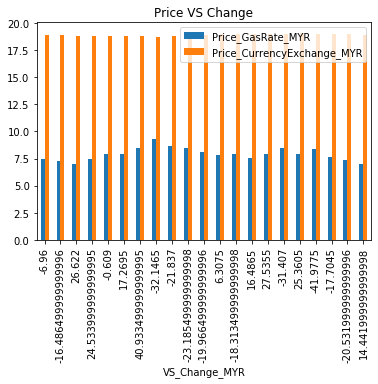

In [20]:
clean_df.plot(x="VS_Change_MYR", y=["Price_GasRate_MYR", "Price_CurrencyExchange_MYR"], kind="bar", title="Price VS Change")

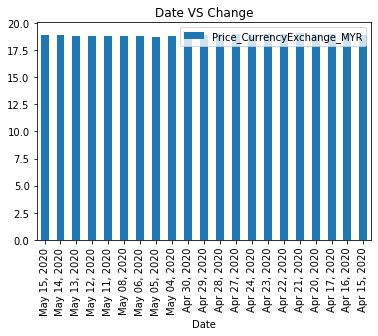

In [21]:
clean_df.plot(x="Date", y=["Price_CurrencyExchange_MYR"], kind="bar", title="Date VS Change")